In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split



We will use a dataset `heart.csv` avaialable from https://archive.ics.uci.edu/dataset/45/heart+disease, which contains health information of each person (these are the predictors). 

In [2]:
import pandas as pd

data = {
    "Name": ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak', 'Slope',"ca","thal",'num'],
    "Role": ["Feature", "Feature","Feature","Feature","Feature", "Feature","Feature","Feature","Feature","Feature", "Feature","Feature","Feature","Target"],
    "type": ['Integer','Categorical','Categorical','Integer','Integer','Categorical','Categorical','Integer','Categorical','Integer', 'Integer','Integer','Integer',"Integer"],
    "Demographic": ["Age","Sex","","","","","","","","","","","",""], 
    "Description": ["age in years", 
                    "1 = male; 0 = female",
                    "Chest Pain Type:Value 1: typical angina,Value 2: atypical angina,Value 3: non-anginal pain,Value 4: asymptomatic",
                    'Resting blood pressure (on admission to the hospital)',
                    'serum cholestoral',
                    '(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)',
                    "resting electrocardiographic results,Value 0: normal,Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria",
                    'maximum heart rate achieved',
                    'exercise induced angina (1 = yes; 0 = no)',
                    'ST depression induced by exercise relative to rest',
                    "the slope of the peak exercise ST segment:Value 1: upsloping,Value 2: flat,Value 3: downsloping",
                    "number of major vessels (0-3) colored by flourosopy",
                    " 3 = normal; 6 = fixed defect; 7 = reversable defect",
                    "diagnosis of heart disease"],
    "Units": ['years','','','mm Hg','mg/dl' ,'','','','','', "","","",""],
    "Missing Values": ["no", "no", "no", "no", "no" , "no", "no", "no", "no", "no","no", "no", "no", "no"]
}

df = pd.DataFrame(data)
df

Name     Role         type Demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical               
3   trestbps  Feature      Integer               
4       chol  Feature      Integer               
5        fbs  Feature  Categorical               
6    restecg  Feature  Categorical               
7    thalach  Feature      Integer               
8      exang  Feature  Categorical               
9    oldpeak  Feature      Integer               
10     Slope  Feature      Integer               
11        ca  Feature      Integer               
12      thal  Feature      Integer               
13       num   Target      Integer               

                                          Description  Units Missing Values  
0                                        age in years  years             no  
1                                1 = male; 0 = female                    no  
2   Chest Pain Type:Value 1: typical angina,Value ...                    no  
3   Resting blood pressure (on admission to the ho...  mm Hg             no  
4                                   serum cholestoral  mg/dl             no  
5   (fasting blood sugar > 120 mg/dl) (1 = true; 0...                    no  
6   resting electrocardiographic results,Value 0: ...                    no  
7                         maximum heart rate achieved                    no  
8           exercise induced angina (1 = yes; 0 = no)                    no  
9   ST depression induced by exercise relative to ...                    no  
10  the slope of the peak exercise ST segment:Valu...                    no  
11  number of major vessels (0-3) colored by flour...                    no  
12   3 = normal; 6 = fixed defect; 7 = reversable ...                    no  
13                         diagnosis of heart disease                    no

# (a) Load and review the data


In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [5]:
import numpy as np
import pandas as pd
combine_df= pd.concat([X, y], axis=1)

In [6]:
combine_df.to_csv("heart_disease_data_file", index=False) # save downloaded data into csv file 

In [7]:
heart_df = pd.read_csv("heart_disease_data_file")

In [8]:
#heart_df.info()

In [9]:
heart_df=heart_df[heart_df.notnull()] # which columns have missing data
heart_df.count().sort_values(ascending = True) # order to see which columns have missing data 

ca          299
thal        301
age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
num         303
dtype: int64

In [10]:
heart_df=heart_df.dropna()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal'),
  Text(13, 0, 'num')])

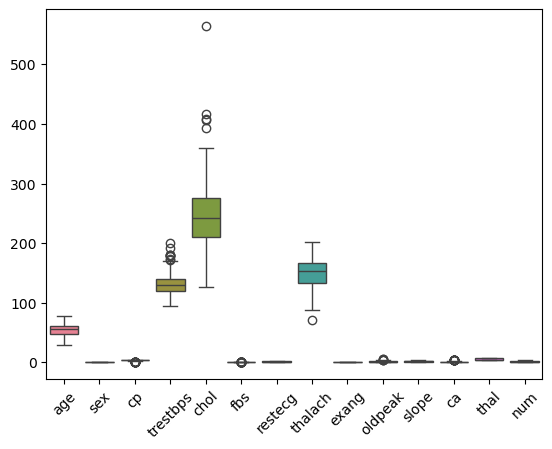

In [11]:
sns.boxplot(heart_df) # boxplot making it easy to see which columns are categorical variables
plt.xticks(rotation= 45)


In [12]:
heart_describe=heart_df.describe()
heart_describe

age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.941562    0.469761    1.166123    0.618187    0.938965   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal         num  
count  297.000000  297.000000  
mean     4.730640    0.946128  
std      1.938629    1.234551  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

In [13]:
from sklearn.model_selection import train_test_split
# split the wine dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(
   heart_df[[ 'age','sex','cp','trestbps','chol','fbs',
               'restecg','thalach','exang','oldpeak',
               'slope',"ca","thal"]], heart_df['num'],random_state=100)

In [14]:
from sklearn.feature_selection import chi2
# Selecting features from the training dataset
X_train_features = X_train[[  'age','sex','cp','trestbps','chol','fbs',
               'restecg','thalach','exang','oldpeak',
               'slope',"ca","thal"]]
# Calculating chi-square statistics and p-values for the training dataset
chi2_stats, p_values = chi2(X_train_features, y_train)

In [15]:
#import mglearn- check to see if this works and remove if not needed 
# Create a DataFrame to display the attributes, chi-square statistics, and p-values
attributes = [  'age','sex','cp','trestbps','chol','fbs',
               'restecg','thalach','exang','oldpeak',
               'slope',"ca","thal"]
chi2_results = pd.DataFrame({'Attribute': attributes,
                             'Chi-square statistic': chi2_stats,
                             'P-value': p_values})
# Sort the DataFrame by the chi-square statistic in descending order
chi2_results = chi2_results.sort_values(by='Chi-square statistic', ascending=False)
chi2_results['Chi-square statistic'] = chi2_results['Chi-square statistic']
# Optionally, set the display option to prevent scientific notation
pd.options.display.float_format = '{:.10f}'.format
# Display the DataFrame
print(chi2_results)

   Attribute  Chi-square statistic      P-value
7    thalach        150.4258881287 0.0000000000
11        ca         64.7526645761 0.0000000000
9    oldpeak         58.1914000151 0.0000000000
12      thal         51.5205114339 0.0000000002
8      exang         35.1356988765 0.0000004357
4       chol         32.3776254588 0.0000016015
0        age         26.2967625758 0.0000275700
3   trestbps         23.5180786783 0.0000997544
2         cp         12.5959276552 0.0134286010
6    restecg         11.0653618086 0.0258391759
10     slope          6.8269189151 0.1453223910
5        fbs          4.9015422918 0.2975498755
1        sex          4.1223260570 0.3897038801


# (b) Data Cleaning

In [16]:
# define a funtion heart_disease if num = 0 than no_disease otherwise heart disease.  

def categorize_score(heart_disease):
    if heart_disease ==0: 
        return 0 
    else: 
        return 1
heart_df['Disease Status']=heart_df['num'].apply(categorize_score) #apply the funtion to the df 

In [17]:
heart_df=heart_df[heart_df['ca']<4]  # ensure the range is 0 to 3
heart_df=heart_df[heart_df['thal']>=0]  # ensure the range is correct

In [18]:
heart_copy=heart_df.copy() # make a new data frame for the categorized data 

In [19]:
def convert_gender(sex):  #define a funtion to convert back to categorize data
    if sex in [1]:
        return 'male'
    elif sex in [0]:
        return 'female'
    else:
        return ' '
heart_copy['sex']=heart_copy['sex'].apply(convert_gender) # apply funstion to data frame 

In [20]:
#cp: chest pain type chest pain type
def convert_chest_pain_type(value):   #define a funtion to convert back to categorize data
    if value in [1]:
        return 'typical angina'
    elif value in [2]:
        return 'atypical angina'
    elif value in [3]:
        return 'non-anginal pain'
    elif value in [4]:
        return 'asymptomatic'
    else:
        return ' '
heart_copy['cp']=heart_copy['cp'].apply(convert_chest_pain_type) # apply funstion to data frame 

In [21]:
heart_copy['fbs']=(heart_copy.fbs ==1).astype(str) # converts to true and false 

In [22]:
#restecg: resting electrocardiographic results (0 normal; 
#1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV);
#2 = showing probable or definite left ventricular hypertrophy by Estes' criteria.
def convert_restecg(value):   #define a funtion to convert back to categorize data
    if value in [0]:
        return 'normal'
    elif value in [1]:
        return 'ST-T wave abnormality'
    elif value in [2]:
        return 'left ventricular hypertrophy'
    else:
        return ' '
heart_copy['restecg']=heart_copy['restecg'].apply(convert_restecg) # apply funstion to data frame  

In [23]:
#exng: exercise induced angina (1 = yes; 0 = no)
def convert_exercise_induced_angina(value):   #define a funtion to convert back to categorize data
    if value in [0]:
        return 'no'
    elif value in [1]:
        return 'yes'
    else:
        return ' '
heart_copy['exang']=heart_copy['exang'].apply(convert_exercise_induced_angina) # apply funstion to data frame 

In [24]:
#slp:the slope of the peak exercise ST segment ( 0= upsloping; 1= flat; 2 = downsloping )
def convert_slope_exercise(value):   #define a funtion to convert back to categorize data 
    if value in [1]:
        return 'upsloping'
    elif value in [2]:
        return 'flat'
    elif value in [3]:
        return 'downsloping'
    else:
        return ' '
heart_copy['slope']=heart_copy['slope'].apply(convert_slope_exercise) # apply funstion to data frame    

In [25]:
#thall (Thalassemias): 0 = error (in the original dataset 0 maps to NaN's); 1 = fixed defect ; 2 = normal; 3 = reversable defect
def convert_Thalassemias(value):   #define a funtion to convert back to categorize data 
    if value in [3]:
        return 'fixed defect'
    elif value in [6]:
        return 'normal'
    elif value in [7]:
        return 'reversable defect'
    else:
        return ' '
heart_copy['thal']=heart_copy['thal'].apply(convert_Thalassemias) # apply funstion to data frame 

In [26]:
def convert_Target(value):   #define a funtion to convert back to categorize data
    if value in [0]:
        return 'Heart  Disease'
    elif value in [1]:
        return 'No Heart Disease'
    else:
        return ' '

heart_copy['Disease Status_']=heart_copy['Disease Status'].apply(convert_Target) # apply funstion to data frame 

# (C) Visualize the Data

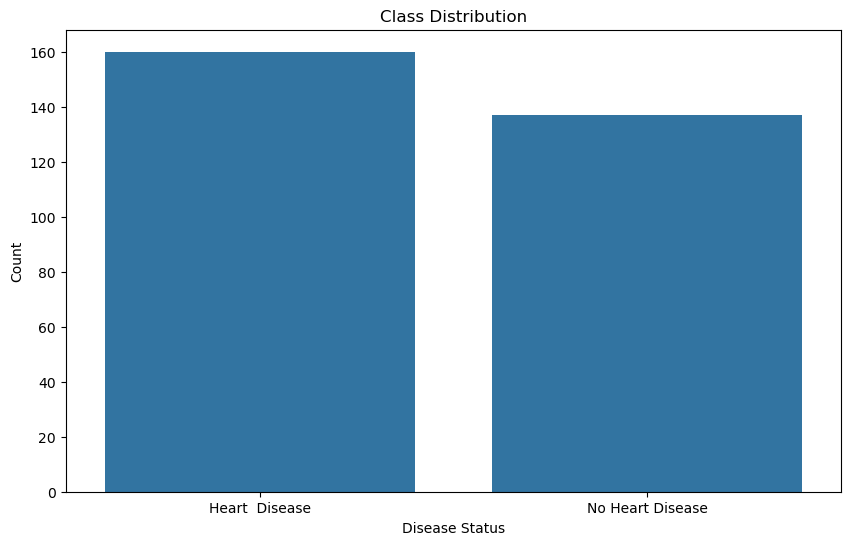

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
class_counts = heart_copy['Disease Status_'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Disease Status')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

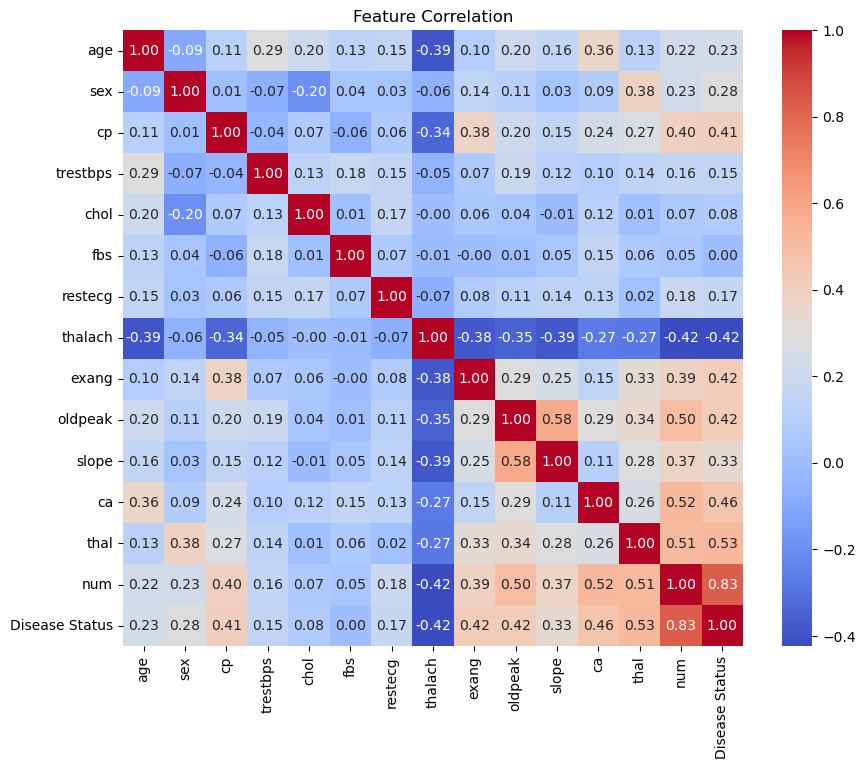

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(heart_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

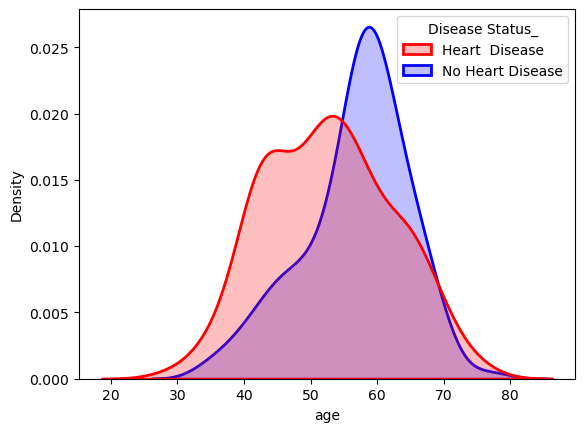

In [29]:
# help from Sophin Liu
sns.kdeplot(data=heart_copy, x='age' # graph using the cati data fram so the ledger shows the categorize
            , hue='Disease Status_' 
            , fill=True
            , linewidth=2
            , palette=['red','blue'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

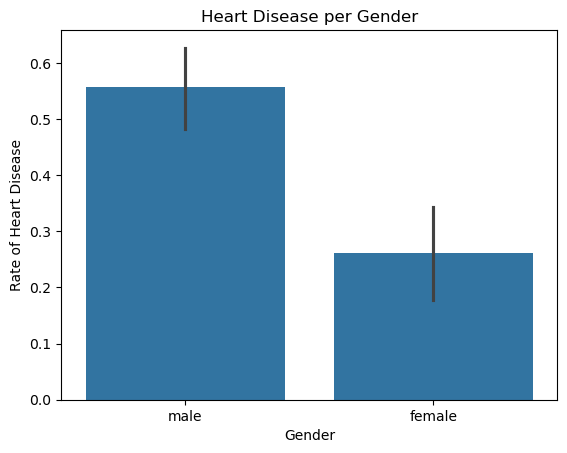

In [30]:
# Barplot to get the mean of the target data keeping in 
# mind 1+0 so we are getting mean of the distribution
sns.barplot(data=heart_copy, x="sex", y='Disease Status') 
plt.ylabel('Rate of Heart Disease') # y label 
plt.xlabel("Gender") # x label 
plt.title('Heart Disease per Gender')# graph titel 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

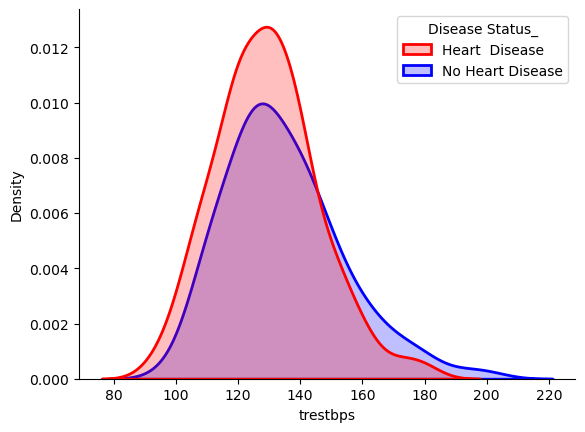

In [31]:
sns.kdeplot(data=heart_copy, x='trestbps'
            , hue='Disease Status_'
            , fill=True
            , linewidth=2
            , palette=['red','blue'])
sns.despine(right=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

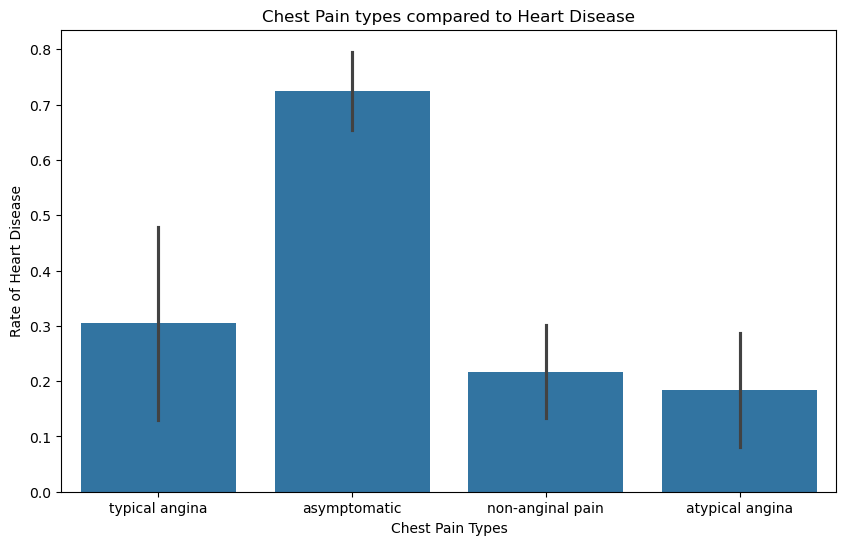

In [32]:
#Barplot to get the mean of the target data keeping in mind 1+0 so we are getting mean of the distribution.

plt.figure(figsize=(10,6)) 
sns.barplot(data=heart_copy, x="cp", y='Disease Status') 

plt.ylabel('Rate of Heart Disease') # y label 
plt.xlabel("Chest Pain Types") # x label 
plt.title('Chest Pain types compared to Heart Disease')# graph titel 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

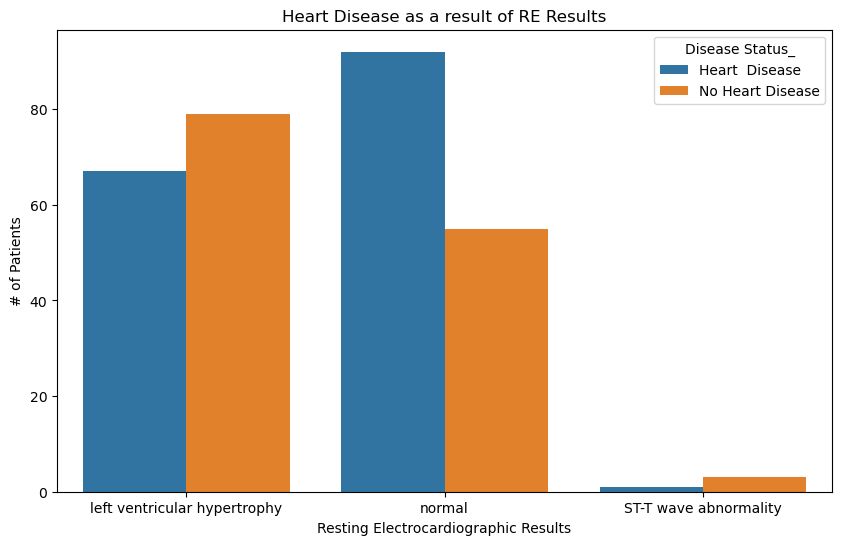

In [33]:
plt.figure(figsize=(10,6)) 
sns.countplot(data=heart_copy, x="restecg", hue='Disease Status_') 

plt.ylabel('# of Patients') # y label 
plt.xlabel("Resting Electrocardiographic Results") # x label 
plt.title('Heart Disease as a result of RE Results')# graph titel 
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

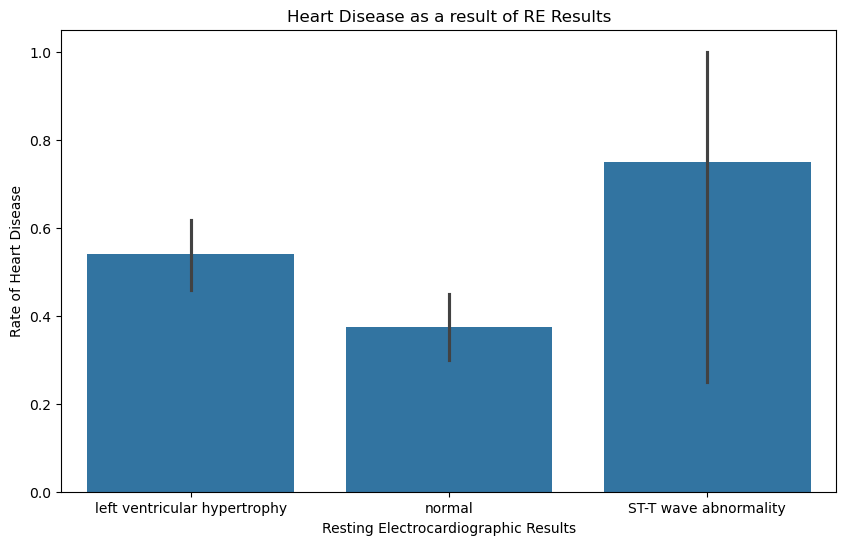

In [34]:
plt.figure(figsize=(10,6)) 
sns.barplot(data=heart_copy, x="restecg", y='Disease Status') 

plt.ylabel('Rate of Heart Disease') # y label 
plt.xlabel("Resting Electrocardiographic Results") # x label 
plt.title('Heart Disease as a result of RE Results')# graph titel 
plt.show

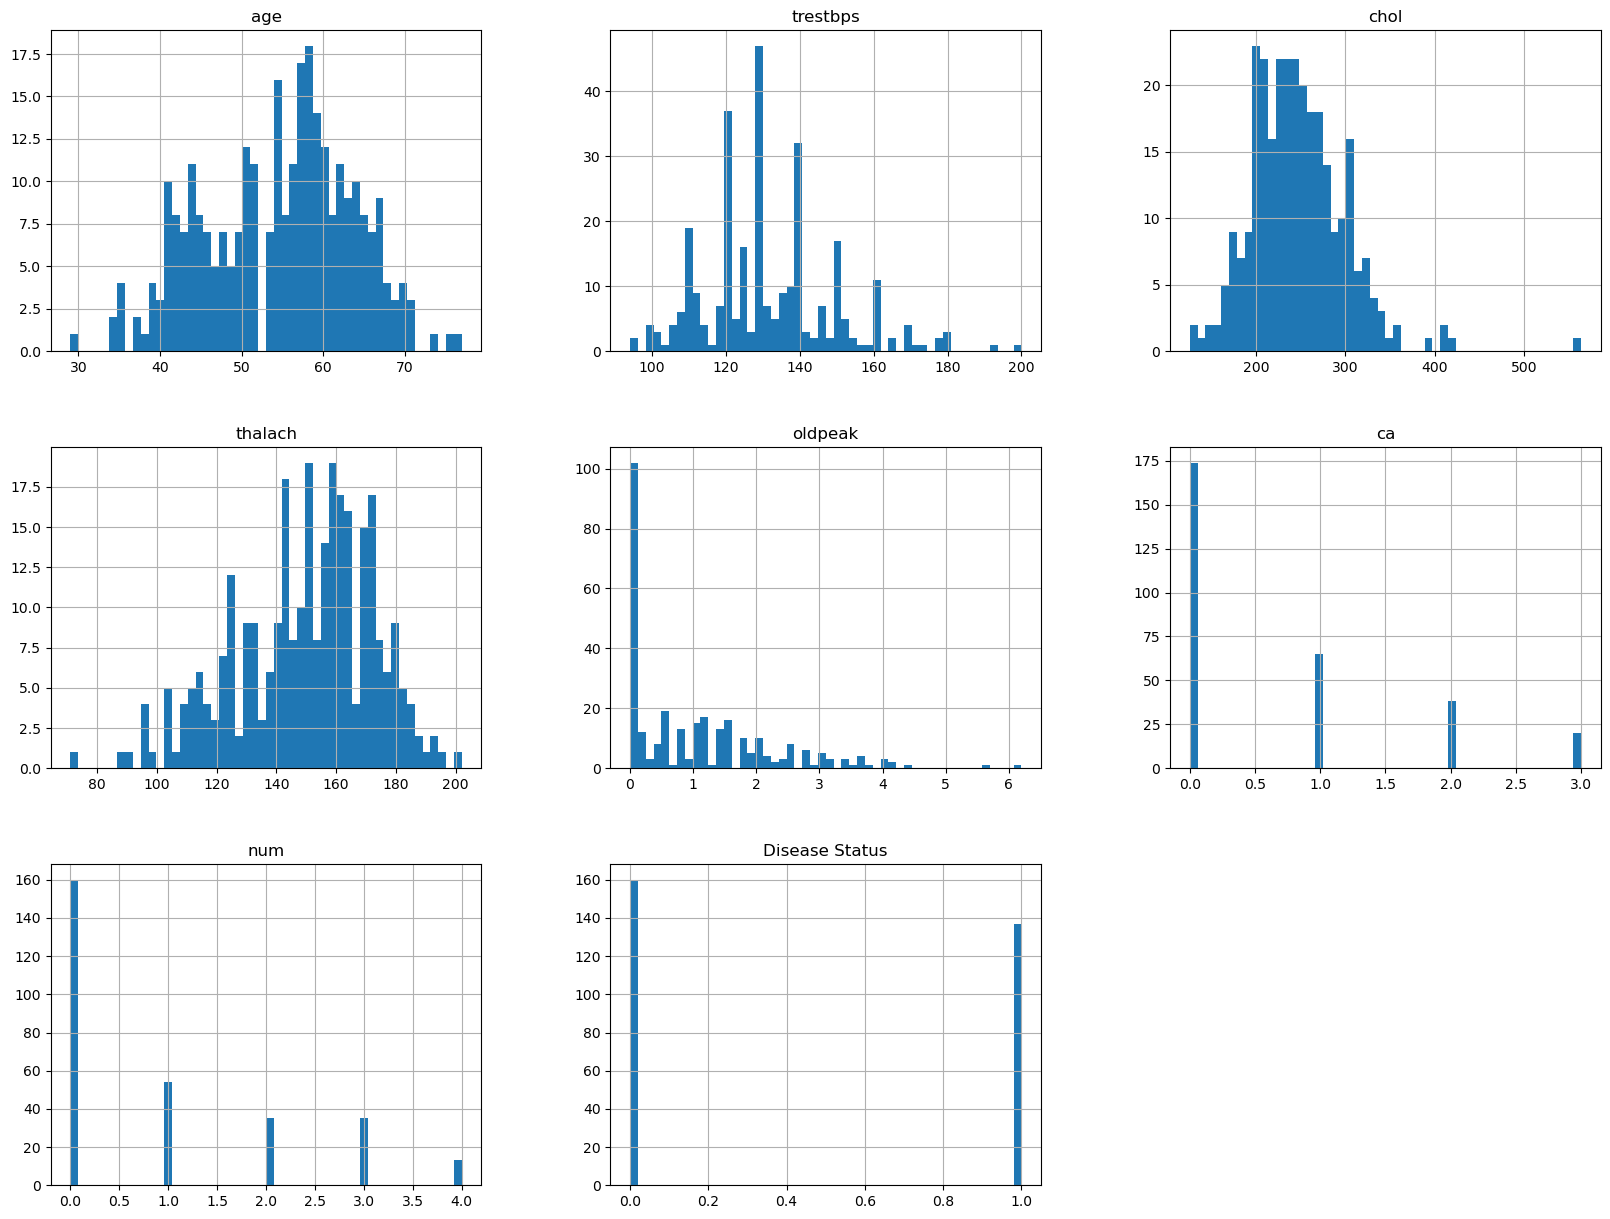

In [35]:
import matplotlib.pyplot as plt
heart_copy.hist(bins=50, figsize=(20,15))
plt.show()

# (D) Choosing The Model

In [36]:

X = heart_df.drop(['num',"Disease Status"], axis=1)
y=heart_df["Disease Status"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=43)

##### LogisticRegression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the model on the training data
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Predict the classes for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


##### Random Forest 

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


##### SVM

In [39]:
from sklearn import svm # sklearn.linear_model.LinearRegression

# Train the model on the training data
svm_model = svm.SVC().fit(X_train, y_train)

# Predict the classes for the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with StandardScaler and SVM
svm_pipeline = make_pipeline(StandardScaler(), SVC())

# Fit the model to the training data
svm_pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions = svm_pipeline.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


# LogisticRegression

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the heart dataset (a popular dataset for classification)
X = heart_df.drop(['num',"Disease Status"], axis=1)
y=heart_df["Disease Status"]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create a Logistic Regression classifier with multinomial (softmax) strategy
# and using the 'lbfgs' solver (which supports the multinomial loss function)
model = LogisticRegression( solver='lbfgs', max_iter=10000)
# Train the model on the training data
model.fit(X_train, y_train)
# Predict the classes for the test set
y_pred = model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [42]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler() # create an instance that will be used to scale the features.
# The fit_transform() method computes the mean and 
#standard deviation of each feature in the training 
#data and then scales the features based on these statistics. 
#It returns the scaled training data.
X_train=sc_X.fit_transform(X_train)
# fit_transform() separately for the test data. 
#This ensures that the test data is scaled using the mean and 
#standard deviation computed from the training data
X_test=sc_X.fit_transform(X_test)

In [43]:
y_test = y_test.values.ravel() # converting to a  one-dimensional array containing the target values.
# note for self: .values attribute retrieves the underlying data as a NumPy array.The .ravel() method is a function provided by NumPy that flattens multi-dimensional arrays into a one-dimensional array.
#It returns a contiguous flattened array containing the same data as the input array, but reshaped into a one-dimensional array.
#If the input is already one-dimensional, .ravel() will return a flattened copy of the input.

<function matplotlib.pyplot.show(close=None, block=None)>

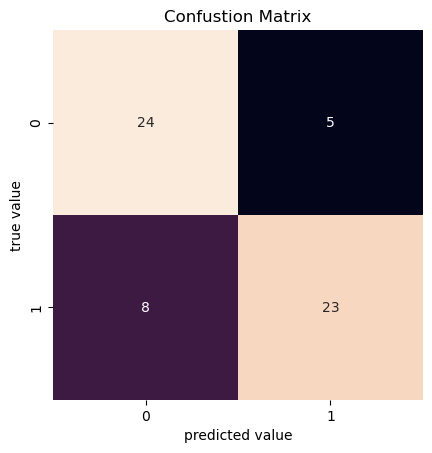

In [44]:
#Python Data Science Handbook
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred) #  resulting confusion matrix (mat) is a two-dimensional array where the rows represent the actual classes and the columns represent the predicted classes.
sns.heatmap(mat, square=True, annot=True, cbar=False) # visualizing the confustion matrix using seaborn
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Confustion Matrix')
plt.show

In [45]:
# run classification report( https://github.com/LinkedInLearning/artificial-intelligence-foundations-machine-learning-3067770/blob/main/LiL-CrimeModel.ipynb)
from sklearn.metrics import classification_report 
print(classification_report(y_pred, y_test)) # get the classification report for the Confustion Matrix

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.74      0.82      0.78        28

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60



# RandomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [48]:
X_features=heart_df.drop(['Disease Status','num'], axis=1) # creating the X_features 

In [49]:
#spliting the data at 20%
X_train, X_test, y_train, y_test = train_test_split(X_features, heart_df['Disease Status'], test_size=0.2) 

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1) # see note below
rf_model = rf.fit(X_train, y_train) # contains the learned patterns from the training data and is ready to make predictions.
# note to self: 
# 1. The n_estimators parameter specifies the number of trees in the random forest. In this case, it's set to 50.
# 2. The max_depth parameter controls the maximum depth of the trees in the forest. Here, it's set to 20.
# 3. The n_jobs parameter specifies the number of parallel jobs to run for both fitting and predicting. Setting it to -1 uses all available CPU cores

In [51]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.1329604890510734, 'oldpeak'),
 (0.11931549607867402, 'thalach'),
 (0.11245107648051098, 'ca'),
 (0.10719351025871811, 'thal'),
 (0.10567438314471066, 'age'),
 (0.08329336997939565, 'chol'),
 (0.08031900335747197, 'trestbps'),
 (0.07448894143802343, 'exang'),
 (0.07251477245685636, 'cp'),
 (0.03877468211782904, 'sex')]

In [52]:
y_pred = rf_model.predict(X_test) # make predictions
conf_matrix = confusion_matrix(y_test, y_pred) # #  resulting confusion matrix (mat) is a two-dimensional array 

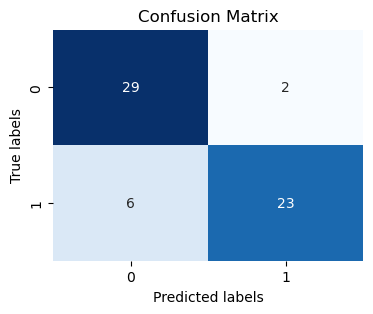

In [53]:
# visualizing the confustion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
from sklearn.metrics import classification_report
 
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.79      0.92      0.85        25

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60



# SVM

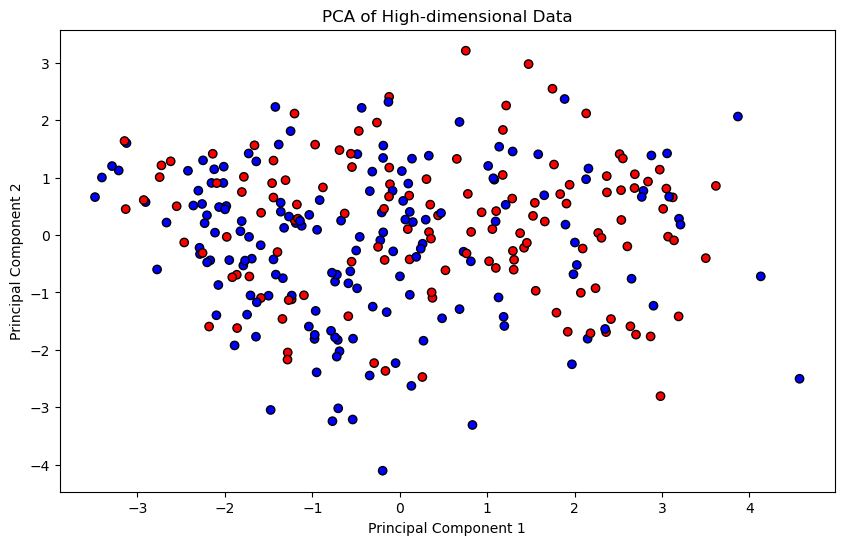

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
features = heart_df.drop(columns=['num', 'Disease Status'] )  
target = heart_df['Disease Status']
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
# Create a new DataFrame for the PCA-transformed data
df_pca = pd.DataFrame(features_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['target'] = target
# Visualize the PCA-reduced data
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=df_pca['target'], cmap='bwr', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of High-dimensional Data')
plt.show()

C:\Users\marieo3\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\marieo3\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


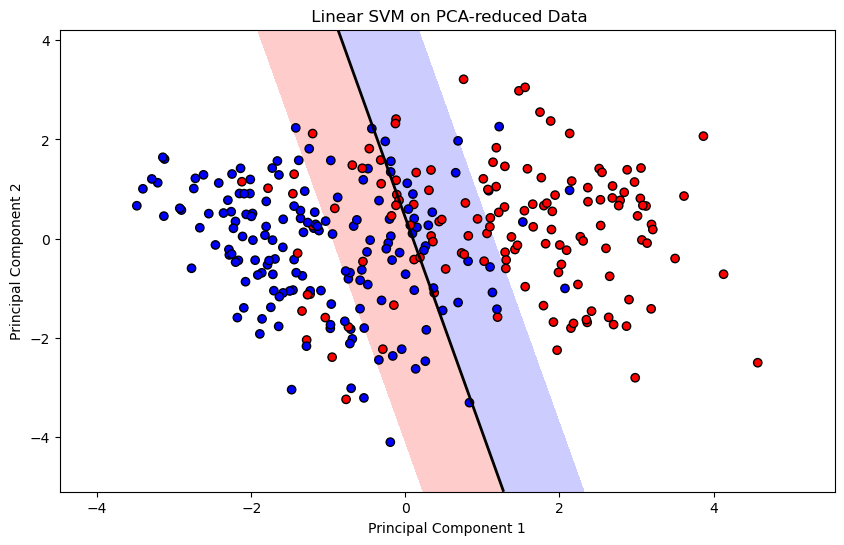

In [84]:
# Step 6: Train an SVM with a Hard Margin and Visualize
# Ensure features_scaled retains column names
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Train an SVM with a hard margin on the original data
svm_hard_margin = SVC(kernel='linear', C= 8.929819536841425, class_weight= 'balanced', coef0= 8.442657485810173, degree= 5,
                    gamma= 'auto', shrinking= False)
svm_hard_margin.fit(features_scaled, target)


# Project the support vectors into the PCA space
support_vectors_pca = pca.transform(scaler.transform(svm_hard_margin.support_vectors_))


# Visualize the decision boundary in the PCA-reduced space
xx, yy = np.meshgrid(np.linspace(features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1, 500),
                     np.linspace(features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1, 500))

# Transform the meshgrid points back to the original space before predicting
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_original_space = pca.inverse_transform(mesh_points)

# Apply the decision function to the meshgrid points
Z = svm_hard_margin.decision_function(mesh_points_original_space)

# Ensure the reshaping matches the meshgrid shape
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['red', 'blue', 'blue'])
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=df_pca['target'], cmap='bwr', edgecolor='k')
#plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=1.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(' Linear SVM on PCA-reduced Data')
plt.show()

C:\Users\marieo3\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


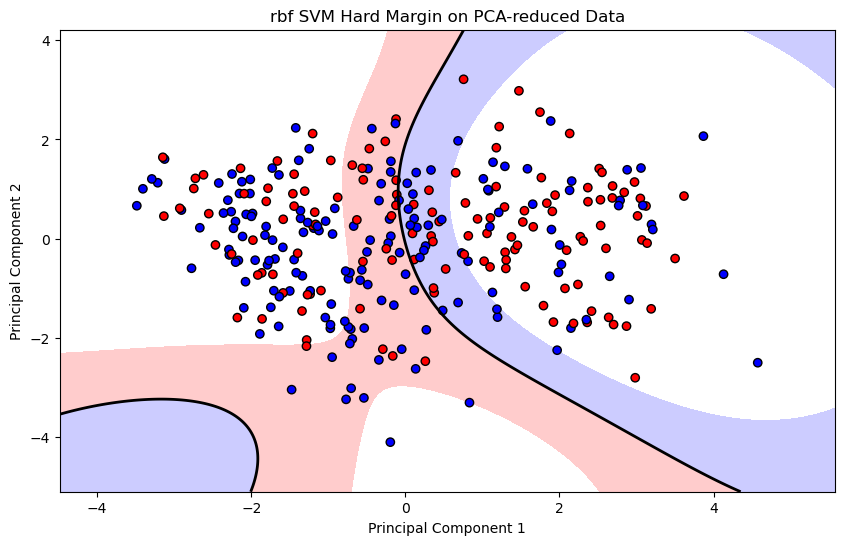

In [57]:
# Step 6: Train an SVM with a Hard Margin and Visualize

# Train an SVM with a hard margin on the original data
svm_hard_margin = SVC(kernel='rbf',C= 623.5636967860723, class_weight= None, coef0=4.375872112626925 , degree= 4, 
                      gamma= 'scale', probability= True, shrinking= True)
svm_hard_margin.fit(features_scaled, target)
# Project the support vectors into the PCA space
support_vectors_pca = pca.transform(scaler.transform(svm_hard_margin.support_vectors_))

# Visualize the decision boundary in the PCA-reduced space
xx, yy = np.meshgrid(np.linspace(features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1, 500),
                     np.linspace(features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1, 500))
# Transform the meshgrid points back to the original space before predicting
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_original_space = pca.inverse_transform(mesh_points)
# Apply the decision function to the meshgrid points
Z = svm_hard_margin.decision_function(mesh_points_original_space)
# Ensure the reshaping matches the meshgrid shape
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['red', 'blue', 'blue'])
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=df_pca['target'], cmap='bwr', edgecolor='k')
#plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=1.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('rbf SVM Hard Margin on PCA-reduced Data')
plt.show()

C:\Users\marieo3\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


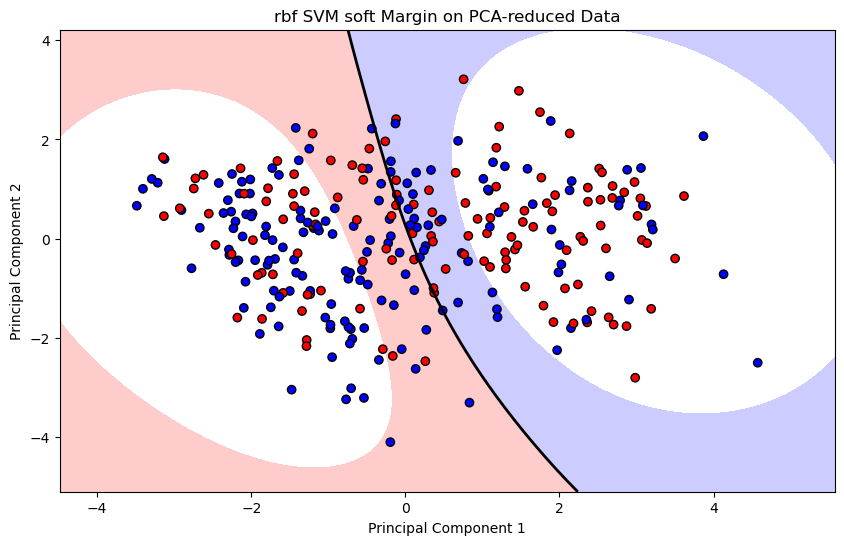

In [58]:
# Step 6: Train an SVM with a Hard Margin and Visualize

# Train an SVM with a hard margin on the original data
svm_hard_margin = SVC(kernel='rbf',C= 0.7781567510498505, class_weight= None, coef0=4.375872112626925 , degree= 4, 
                      gamma= 'scale', probability= True, shrinking= True)
svm_hard_margin.fit(features_scaled, target)
# Project the support vectors into the PCA space
support_vectors_pca = pca.transform(scaler.transform(svm_hard_margin.support_vectors_))
# Visualize the decision boundary in the PCA-reduced space
xx, yy = np.meshgrid(np.linspace(features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1, 500),
                     np.linspace(features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1, 500))
# Transform the meshgrid points back to the original space before predicting
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_original_space = pca.inverse_transform(mesh_points)
# Apply the decision function to the meshgrid points
Z = svm_hard_margin.decision_function(mesh_points_original_space)
# Ensure the reshaping matches the meshgrid shape
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['red', 'blue', 'blue'])
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=df_pca['target'], cmap='bwr', edgecolor='k')
#plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=1.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('rbf SVM soft Margin on PCA-reduced Data')
plt.show()

# Randomized Search

In [59]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)


#spliting the data at  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42) 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Standardize features and fit SVM using a pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline (standardization + SVM) on the training data
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn import svm
# Set up the parameter distributions for RandomizedSearchCV
distributions = {
    'C': uniform(loc=0.0000000001, scale=10),  # Uniform distribution 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],  # Gamma options for 'rbf', 'poly', 'sigmoid'
    'degree': [2, 3, 4, 5],  # Degree options for 'poly'
    'coef0': uniform(loc=0, scale=10),  # Uniform distribution from 0 to 10 for 'poly' and 'sigmoid'
    'class_weight': [None, 'balanced'],  # Class weight options
    'shrinking': [True, False],  # Shrinking options
}
# Initialize the SVM model
svm = svm.SVC()
# Perform RandomizedSearchCV to find the best hyperparameters
clf = RandomizedSearchCV(svm, distributions, random_state=0)
search = clf.fit(X_train, y_train)
# Print the best parameters found by RandomizedSearchCV
print("Best parameters found: ", search.best_params_)
# Use the best estimator from the search
best_svm = search.best_estimator_

Best parameters found:  {'C': 3.8344151883577773, 'class_weight': None, 'coef0': 8.121687287754932, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': False}


In [86]:
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split
# Cross-validate the best model to get an unbiased estimate of its performance
cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5)
print(f"Cross-validated accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
# Train the best model on the training set
best_svm.fit(X_train, y_train)
# Predict on the training and test sets
y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

Cross-validated accuracy: 0.81 ± 0.03


In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC

# Set up the parameter distributions for RandomizedSearchCV
distributions =dict(kernel= ['rbf'],
                    C=uniform(loc=0.0000000001, scale=10),# Uniform distribution from 0.00000001 to 10
                    gamma= ['scale', 'auto'],  # Gamma options for 'rbf', 'poly', 'sigmoid'
                    degree= [2, 3, 4, 5],  # Degree options for 'poly'
                    class_weight= ['balanced'],  
                    shrinking= [True, False],  # Shrinking options
                    probability= [True] ) 
# Initialize the SVM model
svm=SVC()
# Perform RandomizedSearchCV to find the best hyperparameters
clf = RandomizedSearchCV(svm, distributions, random_state=0)
search = clf.fit(X_train, y_train)
# Print the best parameters found by RandomizedSearchCV
print("Best parameters found: ", search.best_params_)
# Use the best estimator from the search
best_svm = search.best_estimator_

Best parameters found:  {'C': 5.4881350393732475, 'class_weight': 'balanced', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'shrinking': False}


In [88]:
# Cross-validate the best model to get an unbiased estimate of its performance
cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5)
print(f"Cross-validated accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
# Train the best model on the training set
best_svm.fit(X_train, y_train)
# Predict on the training and test sets
y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

Cross-validated accuracy: 0.72 ± 0.07


# svm.SVC linear

Training Confusion matrix


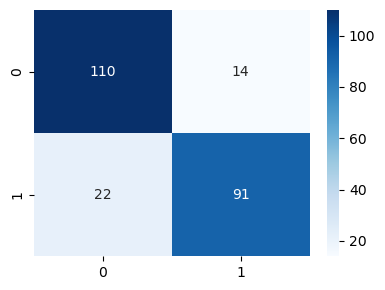

Test Confusion matrix


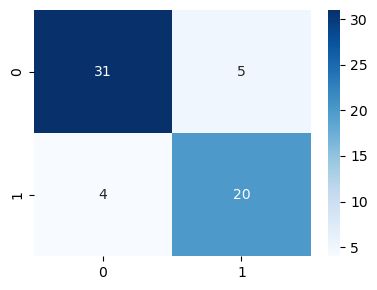

Training Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       124
           1       0.87      0.81      0.83       113

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237

Test Classification Report
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.80      0.83      0.82        24

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.84        60
weighted avg       0.85      0.85      0.85        60



In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
X = heart_df.drop(['num',"Disease Status"], axis=1)
y=heart_df["Disease Status"]

# Create a pipeline with standardization and SVM
svm_pipeline = make_pipeline(StandardScaler(), svm.SVC(C=8.929819536841425, class_weight='balanced', coef0=8.442657485810173,
                                                      degree=5, gamma='auto', kernel='linear', probability=True, shrinking=False))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (standardization + SVM) on the training data
svm_pipeline.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = svm_pipeline.predict(X_train)
y_test_pred = svm_pipeline.predict(X_test)

# Helper function to plot confusion matrix
def plot_confusionmatrix(y_true, y_pred, dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_true, y_pred)
    sns.heatmap(cf, annot=True, cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()    
         
# Plot confusion matrix for training data
plt.figure(figsize=(4, 3))
plot_confusionmatrix(y_train, y_train_pred, 'Training')

# Plot confusion matrix for test data
plt.figure(figsize=(4, 3))
plot_confusionmatrix(y_test, y_test_pred, 'Test')

# Print classification report for training data
print('Training Classification Report')
print(classification_report(y_train, y_train_pred))

# Print classification report for test data
print('Test Classification Report')
print(classification_report(y_test, y_test_pred))

In [90]:
pip install lime


Note: you may need to restart the kernel to use updated packages.


In [91]:
#https://lime-ml.readthedocs.io/en/latest/
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from lime.lime_tabular import LimeTabularExplainer

X = heart_df.drop(['num',"Disease Status"], axis=1)
y=heart_df["Disease Status"]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_standardized, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model=svm.SVC(C= 8.929819536841425, class_weight='balanced', coef0= 8.442657485810173,
                  degree= 5, gamma= 'auto', kernel= 'linear', probability= True,shrinking= False).fit(X_train, y_train)    
# Predict on the training and test sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
# Feature names for your dataset
feature_names = ["age", "sex","cp", "trestbps", "chol",'fbs', "restecg", "thalach", "exang", "oldpeak",'slope', "ca", "thal"]
# Create LIME explainer
explainer = LimeTabularExplainer(X_train, feature_names=feature_names, 
                                 class_names=['no_heart_disease', 'heart_disease'], mode='classification',discretize_continuous=True)
# Select an instance to explain
instance_to_explain = X_test[1].reshape(1, -1)
scores = svm_model.decision_function(instance_to_explain)
# Explain the instance
explanation = explainer.explain_instance(instance_to_explain[0], svm_model.predict_proba, num_features=13)
from IPython.display import display, HTML
# Generate the HTML for the table
table_html = explanation.show_in_notebook(show_table=True, show_all=True)
# Configure pandas to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Display the HTML
display(HTML(table_html))


<IPython.core.display.HTML object>

# svm.SVC Radial Basis Function Hard Margins

Training Confusion matrix


C:\Users\marieo3\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\marieo3\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


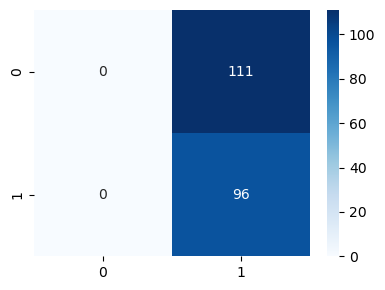

Test Confusion matrix


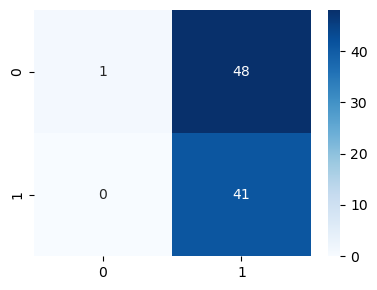

Training Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.46      1.00      0.63        96

    accuracy                           0.46       207
   macro avg       0.23      0.50      0.32       207
weighted avg       0.22      0.46      0.29       207

Test Classification Report
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        49
           1       0.46      1.00      0.63        41

    accuracy                           0.47        90
   macro avg       0.73      0.51      0.34        90
weighted avg       0.75      0.47      0.31        90



C:\Users\marieo3\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marieo3\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marieo3\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [92]:
X = heart_df.drop(['num',"Disease Status"], axis=1)
y=heart_df["Disease Status"]
# Standardize features and fit SVM using a pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC())


# Create a pipeline with standardization and SVM
svm_pipeline = make_pipeline(StandardScaler(), svm.SVC(C= 600, class_weight='balanced', coef0= 4.375872112626925,
                                                       degree= 4, gamma= 'scale', kernel= 'rbf', probability= True,shrinking= True))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline (standardization + SVM) on the training data
svm_pipeline.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = svm_pipeline.predict(X_train)
y_test_pred = svm_pipeline.predict(X_test)


# Predict on the training and test sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
# Helper function to plot confusion matrix
def plot_confusionmatrix(y_true, y_pred, dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_true, y_pred)
    sns.heatmap(cf, annot=True, cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show() 
    
# Plot confusion matrix for training data
plt.figure(figsize=(4, 3))
plot_confusionmatrix(y_train, y_train_pred, 'Training')

# Plot confusion matrix for test data
plt.figure(figsize=(4, 3))
plot_confusionmatrix(y_test, y_test_pred, 'Test')

# Print classification report for training data
print('Training Classification Report')
print(classification_report(y_train, y_train_pred))

# Print classification report for test data
print('Test Classification Report')
print(classification_report(y_test, y_test_pred))

In [93]:
#https://lime-ml.readthedocs.io/en/latest/
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from lime.lime_tabular import LimeTabularExplainer

X = heart_df.drop(['num',"Disease Status"], axis=1)
y=heart_df["Disease Status"]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_standardized, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model=svm.SVC(C= 600, class_weight='balanced', coef0= 4.375872112626925,
                                                       degree= 4, gamma= 'scale', kernel= 'rbf', probability= True,shrinking= True).fit(X_train, y_train)    
# Predict on the training and test sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
# Feature names for your dataset
feature_names = ["age", "sex","cp", "trestbps", "chol",'fbs', "restecg", "thalach", "exang", "oldpeak",'slope', "ca", "thal"]
# Create LIME explainer
explainer = LimeTabularExplainer(X_train, feature_names=feature_names, 
                                 class_names=['no_heart_disease', 'heart_disease'], mode='classification',discretize_continuous=True)
# Select an instance to explain
instance_to_explain = X_test[0].reshape(1, -1)
scores = svm_model.decision_function(instance_to_explain)
# Explain the instance
explanation = explainer.explain_instance(instance_to_explain[0], svm_model.predict_proba, num_features=13)
from IPython.display import display, HTML
# Generate the HTML for the table
table_html = explanation.show_in_notebook(show_table=True, show_all=True)
# Configure pandas to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Display the HTML
display(HTML(table_html))

<IPython.core.display.HTML object>

# svm.SVC Radial Basis Function (RBF) Soft Margins

Training Confusion matrix


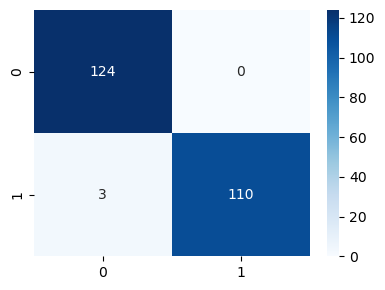

Test Confusion matrix


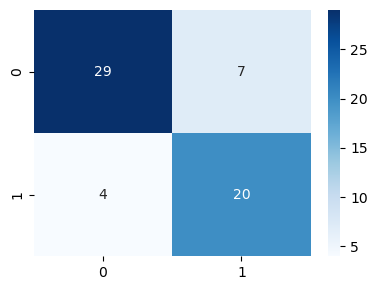

Training Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       124
           1       1.00      0.97      0.99       113

    accuracy                           0.99       237
   macro avg       0.99      0.99      0.99       237
weighted avg       0.99      0.99      0.99       237

Test Classification Report
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        36
           1       0.74      0.83      0.78        24

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



In [94]:
X = heart_df.drop(['num',"Disease Status"], axis=1)
y=heart_df["Disease Status"]
# Standardize features and fit SVM using a pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC())


# Create a pipeline with standardization and SVM
svm_pipeline = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf',C=  9.636627605110293, class_weight= 'balanced', degree= 5,
                                                       gamma= 'scale', probability= True, shrinking= False))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (standardization + SVM) on the training data
svm_pipeline.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = svm_pipeline.predict(X_train)
y_test_pred = svm_pipeline.predict(X_test)


# Helper function to plot confusion matrix
def plot_confusionmatrix(y_true, y_pred, dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_true, y_pred)
    sns.heatmap(cf, annot=True, cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()    
        
# Plot confusion matrix for training data
plt.figure(figsize=(4, 3))
plot_confusionmatrix(y_train, y_train_pred, 'Training')

# Plot confusion matrix for test data
plt.figure(figsize=(4, 3))
plot_confusionmatrix(y_test, y_test_pred, 'Test')

# Print classification report for training data
print('Training Classification Report')
print(classification_report(y_train, y_train_pred))

# Print classification report for test data
print('Test Classification Report')
print(classification_report(y_test, y_test_pred))

In [95]:
#https://lime-ml.readthedocs.io/en/latest/
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from lime.lime_tabular import LimeTabularExplainer

X = heart_df.drop(['num',"Disease Status"], axis=1)
y=heart_df["Disease Status"]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_standardized, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model=svm.SVC(kernel='rbf',C=  0.8712929971154071, class_weight= 'balanced', degree= 5,
                                                       gamma= 'scale', probability= True, shrinking= True).fit(X_train, y_train)    
# Predict on the training and test sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
# Feature names for your dataset
feature_names = ["age", "sex","cp", "trestbps", "chol",'fbs', "restecg", "thalach", "exang", "oldpeak",'slope', "ca", "thal"]
# Create LIME explainer
explainer = LimeTabularExplainer(X_train, feature_names=feature_names, 
                                 class_names=['no_heart_disease', 'heart_disease'], mode='classification',discretize_continuous=True)
# Select an instance to explain
instance_to_explain = X_test[1].reshape(1, -1)
scores = svm_model.decision_function(instance_to_explain)
# Explain the instance
explanation = explainer.explain_instance(instance_to_explain[0], svm_model.predict_proba, num_features=13)
from IPython.display import display, HTML
# Generate the HTML for the table
table_html = explanation.show_in_notebook(show_table=True, show_all=True)
# Configure pandas to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Display the HTML
#display(HTML(table_html))